# Hello and welcome.
## Here we are coding for Toxic comment Classification challenge

### Import libraries

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import re
import string

### Get train and test files.

In [96]:
train_df = pd.read_csv('C:/Users/u35584/Python/Toxic/Input/train.csv')
test_df = pd.read_csv('C:/Users/u35584/Python/Toxic/Input/test.csv')

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [98]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB


In [99]:
COMMENT = 'comment_text'
train_df[COMMENT].fillna("unknown", inplace=True)
test_df[COMMENT].fillna("unknown", inplace=True)

### All rows in test and train dataframes have text. No NaN fields. No cleanup.. 
### Yippie!!!

### Lets work on some data transformations and get some stats now!!

In [100]:
target_cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [101]:
print(train_df[target_cols].sum())

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


### We dont need to concatenate the dataframes here for text transformations.

In [102]:
train_df['comment_len'] = train_df['comment_text'].apply(lambda x: len(str(x)))

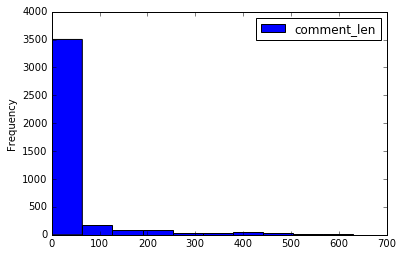

In [103]:
train_df['comment_len'].value_counts().plot(kind='hist', legend='True');

In [104]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_len
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [105]:
test_df['comment_len'] = test_df['comment_text'].apply(lambda x: len(str(x)))

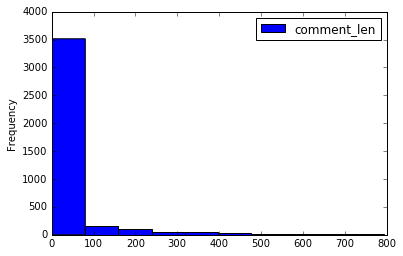

In [106]:
test_df['comment_len'].value_counts().plot(kind='hist', legend='True');

In [107]:
test_df.head()

,id,comment_text,comment_len
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41


#### The comment length distribution of train and test dataset is similar.

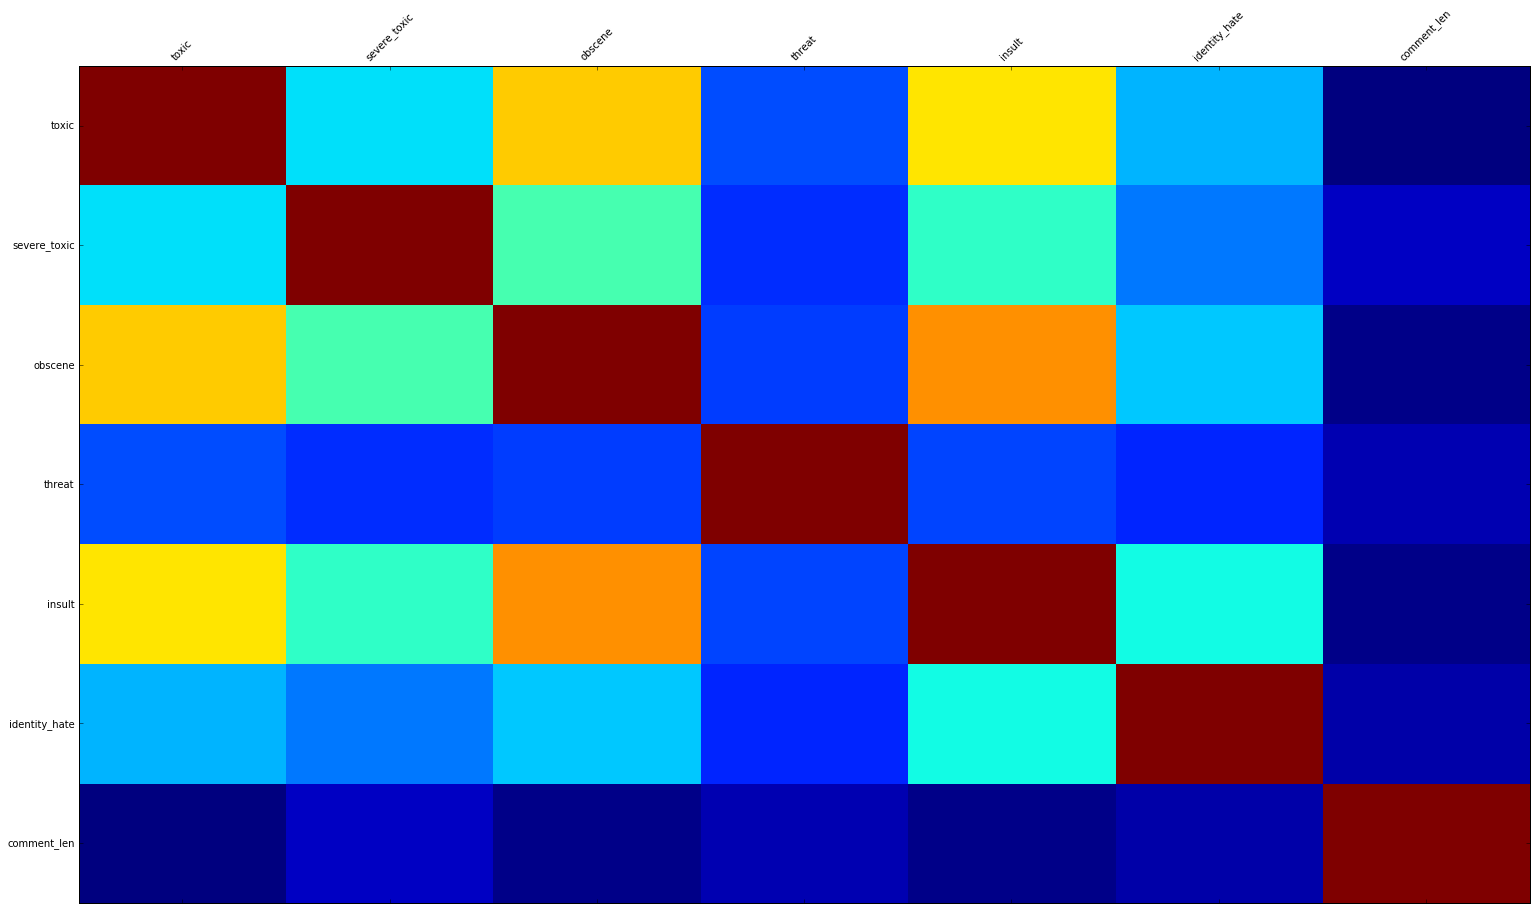

In [108]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(26, 15))
ax.matshow(corrmat, interpolation='nearest', aspect='auto');   # color code the rectangles by correlation value
plt.xticks(range(len(corrmat.columns)), corrmat.columns, rotation = 45);  # draw x tick marks
plt.yticks(range(len(corrmat.columns)), corrmat.columns);  # draw y tick marks

#### Just FYI, TOXIC-OBSCENE, TOXIC - INSULT, OBSCENE - INSULT are more correlated

### Lets clean up teh text now..

In [109]:
def clean_text(text):
    text = re.sub(r"what's", "what is ", text,re.IGNORECASE)
    text = re.sub(r"\'s", " ", text, re.IGNORECASE)
    text = re.sub(r"\'ve", " have ", text,re.IGNORECASE)
    text = re.sub(r"can't", "cannot ", text, re.IGNORECASE)
    text = re.sub(r"n't", " not ", text, re.IGNORECASE)
    text = re.sub(r"i'm", "i am ", text, re.IGNORECASE)
    text = re.sub(r"\'re", " are ", text, re.IGNORECASE)
    text = re.sub(r"\'d", " would ", text, re.IGNORECASE)
    text = re.sub(r"\'ll", " will ", text, re.IGNORECASE)
    text = re.sub(r"\'scuse", " excuse ", text, re.IGNORECASE)
    text = re.sub('\W', ' ', text)  # if other than word change to spaces
    text = re.sub('\s+', ' ', text) # if more than 1 whitespace then convert
    text = re.sub('[@:$/#=()|_]', ' ', text) # remove some of the special characters
    text = re.sub('(HA){2,}', 'HAHA', text, re.IGNORECASE)
    text = re.sub('(ASS){2,}', 'ASS', text, re.IGNORECASE)
    text = re.sub('FUCKE*D', 'FUCKED', text, re.IGNORECASE)
    text = re.sub('FUCK*D', 'FUCKED', text, re.IGNORECASE)
    text = re.sub('ME*E', 'ME', text, re.IGNORECASE)
    text = re.sub(r"It's", "It is", text, re.IGNORECASE)
    text = re.sub('68.173.95.177', ' ', text, re.IGNORECASE)
    text = text.strip(' ')
    return text


In [110]:
cleaned_train_comment = []
for i in range(0,len(train_df)):
    cleaned_comment = clean_text(train_df['comment_text'][i])
    cleaned_train_comment.append(cleaned_comment)
train_df['comment_text'] = pd.Series(cleaned_train_comment).astype(str)

In [111]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_len
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D aww He matches this background colour I m se...,0,0,0,0,0,0,112
2,000113f07ec002fd,Hey man I m really not trying to edit war It j...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,More I cannot make any real suggestions on imp...,0,0,0,0,0,0,622
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0,67


In [112]:
cleaned_test_comment = []
for i in range(0,len(test_df)):
    cleaned_comment = clean_text(test_df['comment_text'][i])
    cleaned_test_comment.append(cleaned_comment)
test_df['comment_text'] = pd.Series(cleaned_test_comment).astype(str)

In [113]:
test_df.head()

,id,comment_text,comment_len
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you wi...,367
1,0000247867823ef7,From RfC The title is fine as it is IMO,50
2,00013b17ad220c46,Sources Zawe Ashton on Lapland,54
3,00017563c3f7919a,If you have a look back at the source the info...,205
4,00017695ad8997eb,I do not anonymously edit articles at all,41


### Drop comment length column from training and test datasets

In [114]:
train_df = train_df.drop('comment_len',axis=1)

In [115]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D aww He matches this background colour I m se...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man I m really not trying to edit war It j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,More I cannot make any real suggestions on imp...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0


In [116]:
X = train_df.comment_text
test_X = test_df.comment_text

In [117]:
concat_df = pd.concat([X , test_X])

In [118]:
print(X.shape, test_X.shape)

(159571,) (153164,)


In [119]:
test_df = test_df.drop('comment_len',axis=1)

In [120]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you wi...
1,0000247867823ef7,From RfC The title is fine as it is IMO
2,00013b17ad220c46,Sources Zawe Ashton on Lapland
3,00017563c3f7919a,If you have a look back at the source the info...
4,00017695ad8997eb,I do not anonymously edit articles at all


In [ ]:
# for my obs 1 i want to use loc to create new column with toxic + super toxic.
#  --> if we have to find probability then this is also useless.
# for my obs 2 related to caps there is no solution.
#dataset.loc[(dataset.Age.isnull()) & (dataset['Title']==0), 'Age']=6

### Vectorization of the comment_text column

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [123]:
vect = TfidfVectorizer(lowercase=True,ngram_range=(1,2),min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1)
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=1,
        stop_words=None, strip_accents='unicode', sublinear_tf=1,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=1,
        vocabulary=None)

In [124]:
#X_dtm = vect.fit_transform(concat_df)
X_dtm = vect.fit_transform(X)

In [125]:
X_dtm

<159571x404194 sparse matrix of type '<class 'numpy.float64'>'
	with 14083542 stored elements in Compressed Sparse Row format>

In [84]:
feature_names = vect.get_feature_names()

In [85]:
feature_names 

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '0000000',
 '00000000',
 '0000000027',
 '00000001',
 '00000003',
 '00000050',
 '000001',
 '00000112000',
 '000002',
 '000002000004000008000016',
 '0000030422',
 '0000035',
 '000023405011',
 '00004',
 '000045',
 '00007632',
 '000080',
 '00008B',
 '00009C',
 '0000z',
 '0001',
 '000111002',
 '00012',
 '000131088',
 '0002',
 '000260',
 '0002tree',
 '0003',
 '000319821',
 '00033',
 '00035',
 '000352',
 '00037',
 '00038',
 '0003º',
 '0004',
 '000500',
 '00052',
 '00053',
 '0006',
 '00075',
 '00098',
 '000FEET',
 '000Hz',
 '000Poland2',
 '000Soviet',
 '000TH',
 '000UnknownUnknown',
 '000UnknownUnknownHungary',
 '000UnknownUnknownItaly',
 '000UnknownUnknownRomania3',
 '000UnknownUnknownTotal',
 '000V',
 '000b01c5b9f8',
 '000ft',
 '000http',
 '000k',
 '000kg',
 '000km',
 '000lb',
 '000s',
 '000shp',
 '000th',
 '000x',
 '000z',
 '001',
 '0010',
 '00107',
 '0010Steve',
 '0011',
 '001200405140111',
 '00122',
 '00136HG',
 '0014',
 '00144feab7de',
 '0015

In [86]:
len(feature_names)

231616

In [109]:
#vect1 = TfidfVectorizer(lowercase=False)
#vect1

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [126]:
test_X_dtm = vect.transform(test_X)
test_X_dtm

<153164x404194 sparse matrix of type '<class 'numpy.float64'>'
	with 11312694 stored elements in Compressed Sparse Row format>

In [35]:
#test_feature_names = vect1.get_feature_names()
#test_feature_names = vect.get_feature_names()

NameError: name 'vect1' is not defined

In [112]:
test_feature_names

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '00000000',
 '000000000000',
 '000000000000000',
 '0000000000000000000000000000',
 '000000000000000000000000000000000FDGKJA',
 '00000000000111265005605361866087675053350036566001020343907867982125026173889636993408203125',
 '000000001',
 '00000003',
 '00000010',
 '00000020',
 '00000030',
 '00000040',
 '00000050',
 '000001',
 '00000102',
 '0000012',
 '0000015',
 '000002974001',
 '000002E4',
 '000002E5',
 '0000030',
 '00000326',
 '0000045',
 '000005',
 '00000aab0f6c',
 '00001',
 '0000104',
 '000013',
 '000014',
 '000015',
 '000016',
 '000018',
 '000019',
 '000020',
 '000022',
 '000023424',
 '000024',
 '0000253111',
 '0000297',
 '000030',
 '000031',
 '000033',
 '000040',
 '000046',
 '000050',
 '000057',
 '000060',
 '000069',
 '000070',
 '000072',
 '000072547',
 '000080',
 '000087',
 '000099',
 '0000FF',
 '0000s',
 '0000z',
 '0001',
 '00012',
 '00014127',
 '00017',
 '00022326',
 '00026',
 '00029',
 '0003',
 '00031',
 '00032',
 '00038',
 '0004',

In [113]:
#len(test_feature_names)

293297

In [88]:
#from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#vect = TfidfVectorizer(max_features=None,min_df=1)
#vect

In [ ]:
# learn the vocabulary in the training data, then use it to create a document-term matrix
#X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
#X_dtm

In [ ]:
# transform the test data using the earlier fitted vocabulary, into a document-term matrix
#test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
#test_X_dtm

## Modelling for probability

In [127]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [128]:
#clf = RandomForestClassifier()
#clf = OneVsRestClassifier(RandomForestClassifier())

clf = LogisticRegression(C=4, dual=True)

subrf = pd.read_csv('C:/Users/u35584/Python/Toxic/sample_submission.csv')

In [129]:
train_y = train_df[target_cols]
train_y.head(10)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,1,1,1,0,1,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [130]:
train_len = len(X)
train_len

159571

In [131]:
'''
## This has to be used when i have used different vectorizor for train and test dataframes

for label in target_cols:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    clf.fit(X_dtm[:159571], y)
    # compute the training accuracy
    y_pred_X = clf.predict(X_dtm[:159571])
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = clf.predict_proba(X_dtm[159571:])[:,1]
    subrf[label] = test_y_prob
'''

"\n## This has to be used when i have used differen vectorizor for train and test dataframes\n\nfor label in target_cols:\n    print('... Processing {}'.format(label))\n    y = train_df[label]\n    # train the model using X_dtm & y\n    clf.fit(X_dtm[:159571], y)\n    # compute the training accuracy\n    y_pred_X = clf.predict(X_dtm[:159571])\n    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))\n    # compute the predicted probabilities for X_test_dtm\n    test_y_prob = clf.predict_proba(X_dtm[159571:])[:,1]\n    subrf[label] = test_y_prob\n"

In [132]:
for label in target_cols:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    clf.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = clf.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = clf.predict_proba(test_X_dtm)[:,1]
    subrf[label] = test_y_prob

... Processing toxic
Training accuracy is 0.9810993225586103
... Processing severe_toxic
Training accuracy is 0.9937958651634695
... Processing obscene
Training accuracy is 0.9883625470793566
... Processing threat
Training accuracy is 0.9980886251261194
... Processing insult
Training accuracy is 0.9850662087722707
... Processing identity_hate
Training accuracy is 0.9945729487187521


In [133]:
subrf.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999659,0.200058,0.998417,0.051750,0.952901,0.425518
1,0000247867823ef7,0.002908,0.001035,0.001304,0.000337,0.003715,0.001493
2,00013b17ad220c46,0.013697,0.001966,0.007953,0.000839,0.007478,0.002124
3,00017563c3f7919a,0.002027,0.001058,0.001635,0.000654,0.001340,0.000683
4,00017695ad8997eb,0.013282,0.002213,0.004803,0.000919,0.005274,0.001594


In [134]:
subrf.to_csv("C:/Users/u35584/Python/Toxic/Input/Submissionrf.csv", index=False)

## Here we have the competition result but below I have tried to create another file with the 
## results for test dataset.

In [121]:
#clf = OneVsRestClassifier(RandomForestClassifier())

In [122]:
#clf.fit(X_dtm[:159571], train_y)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=1)

In [128]:
#clf.score(X_dtm[:159571], train_y)

0.98570542266451922

In [123]:
#test_y = clf.predict(X_dtm[159571:])
test_y = clf.predict(test_X_dtm)
## here i faced an error - ValueError: Number of features of the model must  match the input. Model n_features is 235187 and  input n_features is 296195 

# solution: To concat the files and use slicing..

In [126]:
submission = pd.concat([test_df, pd.DataFrame(test_y.astype(int), columns = target_cols)], axis=1)

In [127]:
submission.shape

(153164, 8)

In [128]:
#pred = np.round(test_y)

#Submission = pd.DataFrame({ 'PassengerId': test_id ,
#                            'Survived': pred.astype(int)})
submission.to_csv("C:/Users/u35584/Python/Toxic/Input/Submission.csv", index=False)

submission.sample()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
119911,c8406b582989dbe9,Plenty of content has been added from reliable...,0,0,0,0,0,0
